### Learning Objectives

- Implement KNN (k nearest neighbor algorithm)
- Choose the best value of k for the KNN
- Bias-Variance trade-off
- Understand different measures of accuracies for regression models
- Compare linear regression and KNN models and select better performing model

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('lesson_4.05_data.csv')

In [3]:
data.head()

,HV1,IC1,IC5,CARDPROM,NUMPRM12,NGIFTALL,TIMELAG,year,GENDER,HOMEOWNR,DOMAIN_letters,RFA_frequency,RFA_monetary,AVGGIFT
0,479,307,12883,27,14,31,4.0,37.000000,F,other,T,4,E,7.741935
1,5468,1088,36175,12,13,3,18.0,52.000000,M,H,S,2,G,15.666667
2,497,251,11576,26,14,27,12.0,37.570799,M,U,R,4,E,7.481481
3,1000,386,15130,27,14,16,9.0,28.000000,F,U,R,4,E,6.812500
4,576,240,9836,43,25,37,14.0,20.000000,F,H,S,2,F,6.864865


In [12]:
y = data['AVGGIFT']
X = data.drop(['AVGGIFT'],axis=1)

In [13]:
numericals = X.select_dtypes(np.number)

In [14]:
transformer = StandardScaler().fit(numericals)
x_standardized = transformer.transform(numericals)

In [15]:
categoricals = X.select_dtypes(exclude=np.number)

In [16]:
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(categoricals)
encoded = encoder.transform(categoricals).toarray()


In [17]:
X = np.concatenate((x_standardized, encoded), axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [18]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=4)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [19]:
predictions = model.predict(X_test)
score = model.score(X_test, y_test)

In [20]:
score

0.21807921776786776

#### Choosing the best value of `k` for the `KNN`


In [ ]:
for i in range(10, 100, 20)

In [21]:
from sklearn.neighbors import KNeighborsRegressor
scores = []
for i in range(2,10):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Text(0, 0.5, 'Accuracy')

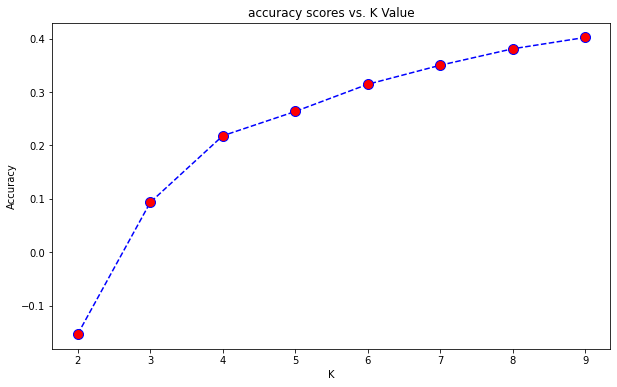

In [24]:
plt.figure(figsize=(10,6))
plt.plot(range(2,10),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

### [Bias-Variance Tradeoff](https://www.youtube.com/watch?v=EuBBz3bI-aA)

### Measures of accuracies for regression models
- `MAE` (Mean Absolute Error)
- `MSE` (Mean Square Errors) and `RMSE` (Root Mean Square Errors)
- `R` square
- Adjusted `R` square

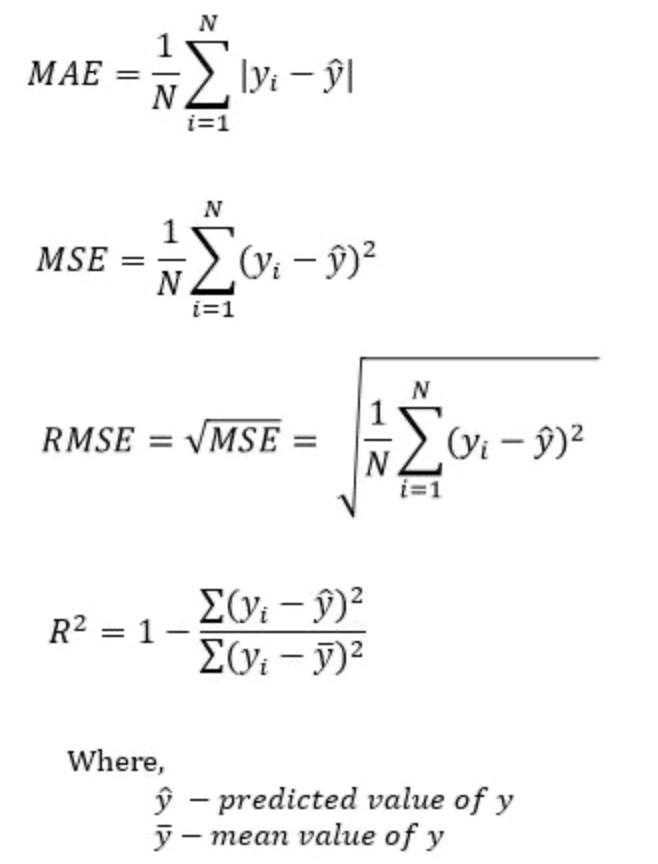

In [29]:
from IPython import display
display.Image("measures_of_accuracies.png", width=400, height=300)

In [35]:
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(y_test, predictions)
score

3.4570664055474998

In [36]:
from sklearn.metrics import mean_squared_error
score = mean_squared_error(y_test, predictions)
score

52.675868056049666

In [37]:
import math
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
rmse

7.2578142753896415

#### R-squared value
The **`R-squared`** is the proportion of the variance in the model predictions that is predictable based on the input values. Practically, it is a measure of how likely future samples are to be predicted accurately by the model.
Adding more independent variables to a regression model tends to increase the `R-squared` value, which might give us a false idea about the accuracy of the model. This would also lead to over-fitting and can return an unwarranted high `R-squared` value.


In [38]:
from sklearn.metrics import r2_score
score = r2_score(y_test, predictions)
score

0.21807921776786776

We use the **adjusted R-squared** to compare regression models that contain different numbers of independent variables. For example, there is a model with 10 variables and the other model has 20 variables. The model with 20 variables will give a larger R square but does that really mean that this model is better than the other model. We can't say it for sure. For this, we use adjusted the `r` square.

Adjusted `r` square adjusts for the number of terms in the model. Its value increases only when the new term improves the model fit while it decreases when the term doesn't improve the model fit by a sufficient amount.

![Adjusted R square](https://education-team-2020.s3-eu-west-1.amazonaws.com/data-analytics/4.5-adjusted_r_square.gif)

N -> Number of rows in test set (X_test) <br>
M -> Number of columns in test set (X_test)

In [40]:
score = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [41]:
score

0.21763666702375695